# Problema de dois corpos 

Em duas dimensões:

$$\frac{d\vec{v}}{dt} = -\frac{GM}{r^2}\hat{r}$$
$$\frac{dv_x}{dt} = -\frac{GMx}{r^3}$$
$$\frac{dv_y}{dt} = -\frac{GMy}{r^3}$$

done


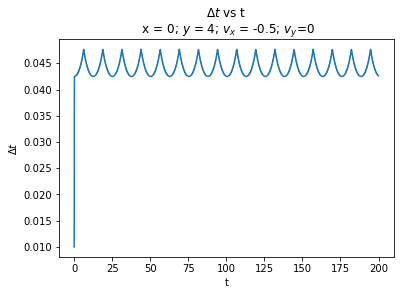

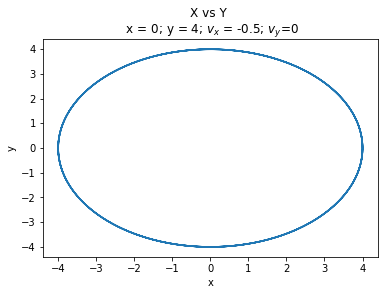

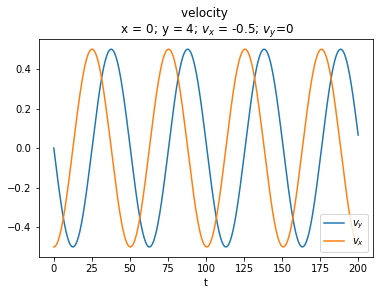

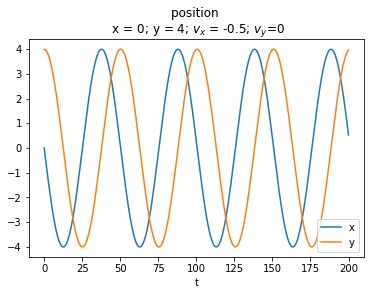

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def fR(vx,vy):
    return vx,vy

def fV(x,y):
    r = np.sqrt(x**2 + y**2)
    a_x = -(GM/(r**3))*x
    a_y = -(GM/(r**3))*y
    return a_x,a_y

def rk2_v_r(x,y,vx,vy):
    k1X,k1Y = fR(vx,vy)
    k1Vx,k1Vy = fV(x,y)
    xaux = x + k1X*dt/2
    yaux = y + k1Y*dt/2
    v_x_aux = vx + k1Vx*dt/2
    v_y_aux = vy + k1Vy*dt/2
    k2X,k2Y = fR(v_x_aux, v_y_aux)
    k2Vx,k2Vy = fV(xaux,yaux)
    vx = vx + k2Vx*dt
    vy = vy + k2Vy*dt
    x = x + k2X*dt
    y = y + k2Y*dt
    return x,y,vx,vy

def rk4_v_r(x,y,vx,vy):
    k1X,k1Y = fR(vx,vy)
    k1Vx,k1Vy = fV(x,y)
    xaux = x + k1X*dt/2
    yaux = y + k1Y*dt/2
    v_x_aux = vx + k1Vx*dt/2
    v_y_aux = vy + k1Vy*dt/2
    k2X,k2Y = fR(v_x_aux, v_y_aux)
    k2Vx,k2Vy = fV(xaux,yaux)
    xaux = x + k2X*dt/2
    yaux = y + k2Y*dt/2
    v_x_aux = vx + k2Vx*dt/2
    v_y_aux = vy + k2Vy*dt/2
    k3X,k3Y = fR(v_x_aux, v_y_aux)
    k3Vx,k3Vy = fV(xaux,yaux)
    xaux = x + k3X*dt
    yaux = y + k3Y*dt
    v_x_aux = vx + k2Vx*dt
    v_y_aux = vy + k2Vy*dt
    k4X,k4Y = fR(v_x_aux, v_y_aux)
    k4Vx,k4Vy = fV(xaux,yaux)
    vx = vx + (1/6)*(k1Vx + 2*k2Vx + 2*k3Vx + k4Vx)*dt
    vy = vy + (1/6)*(k1Vy + 2*k2Vy + 2*k3Vy + k4Vy)*dt
    x = x + (1/6)*(k1X + 2*k2X + 2*k3X + k4X)*dt
    y = y + (1/6)*(k1Y + 2*k2Y + 2*k3Y + k4Y)*dt
    return x,y,vx,vy
    
#condiçoes iniciais 
GM = 1
x0 = x = 0
y0 = y = 4
vx0 = vx = -0.5
vy0 = vy = 0
t0 = 0
tf = 200
tol = 1e-7
dt = 1e-2

x_l = [x]
y_l = [y]
vx_l = [vx]
vy_l = [vy]
t_l = [t0]
dt_l = [dt]

i = 0
while(t0 < tf):
    t0 += dt
    t_l.append(t0)
    x,y,vx,vy = rk2_v_r(x,y,vx,vy)
    
    if (i == 2):
        
        rk2_x,rk2_y,rk2_vx,rk2_vy = rk2_v_r(x,y,vx,vy)
        rk4_x,rk4_y,rk4_vx,rk4_vy = rk4_v_r(x,y,vx,vy)
        
        e_cX = np.sqrt((rk2_x - rk4_x)**2)
        e_cY = np.sqrt((rk2_y - rk4_y)**2)
        e_cVx = np.sqrt((rk2_vx - rk4_vx)**2)
        e_cVy = np.sqrt((rk2_vy - rk4_vy)**2)
        error_list = [e_cX, e_cY,e_cVx,e_cVy]
        e_c = max(error_list)
        delta_tNovo = dt*(tol/e_c)**(1/3) #ordem erro local RK2
        
        if(delta_tNovo > 2*dt):
            delta_tNovo = 2*dt
            
        elif(delta_tNovo < dt/2 ):
            delta_tNovo = dt/2
        
        dt = delta_tNovo
        
        i = 0
   
    x_l.append(x)
    y_l.append(y)
    vx_l.append(vx)
    vy_l.append(vy)
    dt_l.append(dt)
    i += 1
    
print("done")


plt.figure()
plt.title("$\Delta t$ vs t \n x = {0}; $y$ = {1}; $v_x$ = {2}; $v_y$={3}".format(x0,y0,vx0,vy0))
plt.xlabel("t")
plt.ylabel("$\Delta t$")
plt.plot(t_l,dt_l)
plt.show()
#plt.savefig("deltaT_vx_{0}.pdf".format(vx0))
plt.close()

plt.figure()
plt.title("X vs Y \n x = {0}; y = {1}; $v_x$ = {2}; $v_y$={3}".format(x0,y0,vx0,vy0))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_l,y_l)
plt.show()
#plt.savefig("xy_vx_{0}.pdf".format(vx0))
plt.close()

plt.figure()
plt.title("velocity \n x = {0}; y = {1}; $v_x$ = {2}; $v_y$={3}".format(x0,y0,vx0,vy0))
plt.xlabel("t")
plt.ylabel("")
plt.plot(t_l,vy_l, label="$v_y$" )
plt.plot(t_l,vx_l, label="$v_x$")
plt.legend()
plt.show()
#plt.savefig("velocity_vx_{0}.pdf".format(vx0))
plt.close()


plt.figure()
plt.title("position \n x = {0}; y = {1}; $v_x$ = {2}; $v_y$={3}".format(x0,y0,vx0,vy0))
plt.xlabel("t")
plt.ylabel("")
plt.plot(t_l,x_l, label="x" )
plt.plot(t_l,y_l, label="y")
plt.legend()
plt.show()
#plt.savefig("position_vx_{}.pdf".format(vx0))
plt.close()

